In [1]:
import pandas as pd
import networkx as nx

In [2]:
graph_df = pd.read_csv('../public/graph.csv', header=None, sep=';')
graph_df

0          1          2          3
0      -43.206859 -22.980949 -43.206925 -22.981470
1      -43.206859 -22.980949 -43.206392 -22.980959
2      -43.204756 -22.981045 -43.204708 -22.980168
3      -43.204756 -22.981045 -43.202639 -22.981160
4      -43.202639 -22.981160 -43.202592 -22.980450
...           ...        ...        ...        ...
171372 -43.216103 -22.867459 -43.214349 -22.867856
171373 -43.216226 -22.867354 -43.216655 -22.866695
171374 -43.216226 -22.867354 -43.216242 -22.867488
171375 -43.216242 -22.867488 -43.214349 -22.867856
171376 -43.216242 -22.867488 -43.216103 -22.867459

[171377 rows x 4 columns]

In [310]:
with open('../public/graph.csv') as f:
    lines = f.readlines()

In [311]:
data = [l.strip('\n').split(';') for l in lines]
# data1 = []
for i, row in enumerate(data):
    data[i] = [(float(row[0]),float(row[1])),\
               (float(row[2]),float(row[3]))]
    # data1.append([float(i) for i in row])

data

[[(-43.2068586, -22.9809491), (-43.2069254, -22.9814703)],
 [(-43.2068586, -22.9809491), (-43.2063921, -22.9809587)],
 [(-43.2047561, -22.981045), (-43.2047082, -22.9801679)],
 [(-43.2047561, -22.981045), (-43.202639, -22.9811603)],
 [(-43.202639, -22.9811603), (-43.2025921, -22.9804502)],
 [(-43.202639, -22.9811603), (-43.2018481, -22.9811921)],
 [(-43.2005072, -22.9812671), (-43.2004884, -22.980948)],
 [(-43.2005072, -22.9812671), (-43.2005985, -22.9823132)],
 [(-43.2005072, -22.9812671), (-43.1991709, -22.9813286)],
 [(-43.2069254, -22.9814703), (-43.2069634, -22.9819971)],
 [(-43.2069254, -22.9814703), (-43.2047923, -22.981584)],
 [(-43.2047923, -22.981584), (-43.2047561, -22.981045)],
 [(-43.2047923, -22.981584), (-43.2026731, -22.9816651)],
 [(-43.2026731, -22.9816651), (-43.202639, -22.9811603)],
 [(-43.2005985, -22.9823132), (-43.1996049, -22.9823785)],
 [(-43.2005985, -22.9823132), (-43.2027095, -22.982206)],
 [(-43.2005985, -22.9823132), (-43.2006642, -22.9833811)],
 [(-43.20

In [5]:
G = nx.Graph()
G.add_edges_from(data)

---

### Pagerank

In [6]:
pagerank = nx.pagerank(G)

In [7]:
file = open('../public/pagerank.csv', "w")
keys_list = list(pagerank.keys())

for i in pagerank.keys():
    if i == keys_list[-1]:
        file.write(str(i[0])+','+str(i[1])+','+str(pagerank[i]))
    else:
        file.write(str(i[0])+','+str(i[1])+','+str(pagerank[i])+'\n')

file.close()

---

### Degree centrality

In [8]:
degree_centrality = nx.degree_centrality(G)

In [9]:
file = open('../public/degree_centrality.csv', "w")
keys_list = list(degree_centrality.keys())

for i in degree_centrality.keys():
    if i == keys_list[-1]:
        file.write(str(i[0])+','+str(i[1])+','+str(degree_centrality[i]))
    else:
        file.write(str(i[0])+','+str(i[1])+','+str(degree_centrality[i])+'\n')

file.close()

---

### Closeness centrality

**Nota mental:** betweenness é mais tranquilo de calcular que closeness

In [10]:
G.nodes()

NodeView(((-43.2068586, -22.9809491), (-43.2069254, -22.9814703), (-43.2063921, -22.9809587), (-43.2047561, -22.981045), (-43.2047082, -22.9801679), (-43.202639, -22.9811603), (-43.2025921, -22.9804502), (-43.2018481, -22.9811921), (-43.2005072, -22.9812671), (-43.2004884, -22.980948), (-43.2005985, -22.9823132), (-43.1991709, -22.9813286), (-43.2069634, -22.9819971), (-43.2047923, -22.981584), (-43.2026731, -22.9816651), (-43.1996049, -22.9823785), (-43.2027095, -22.982206), (-43.2006642, -22.9833811), (-43.2069913, -22.9825268), (-43.209065, -22.981876), (-43.2048317, -22.9820994), (-43.2070258, -22.9830556), (-43.2048593, -22.9826381), (-43.2027824, -22.9832869), (-43.2048942, -22.9831704), (-43.2007325, -22.9844518), (-43.2025307, -22.9795532), (-43.2008934, -22.9799521), (-43.2012892, -22.9800821), (-43.1998095, -22.9787595), (-43.2033365, -22.9797922), (-43.2028547, -22.9843556), (-43.2008071, -22.9855586), (-43.1985999, -22.9845781), (-43.1985346, -22.9834925), (-43.1967619, -22

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
file1 = open('../public/regions.geojson')
file2 = open('../public/neighborhoods.geojson')

df_regions = gpd.read_file(file1)
df_neighborhoods = gpd.read_file(file2)

In [13]:
list(G.nodes())[0][0]

-43.2068586

In [14]:
df_regions.head()

objectid_1  objectid        nomera  codra codap  codapnum cod_ap_sms  \
0           1         1     Portuária      1     1         1     AP 1     
1           2         2        Centro      2     1         1     AP 1     
2           3         3  Rio Comprido      3     1         1     AP 1     
3           4         4      Botafogo      4     2         2     AP 2.1   
4           5         5    Copacabana      5     2         2     AP 2.1   

       sum_area    shape_leng  st_areashape  st_perimetershape  \
0  8.508921e+06  28198.644376  8.508944e+06       28198.682016   
1  5.723065e+06  22240.437835  5.723080e+06       22240.467511   
2  5.797223e+06  15453.170174  5.797238e+06       15453.190512   
3  1.502583e+07  40309.096634  1.502587e+07       40309.149987   
4  5.078049e+06  16732.503251  5.078063e+06       16732.525518   

                                            geometry  
0  MULTIPOLYGON (((-43.22522 -22.87465, -43.22522...  
1  MULTIPOLYGON (((-43.17833 -22.89258, -43.17833...  
2  POLYGON ((-43.21012 -22.91583, -43.21019 -22.9...  
3  MULTIPOLYGON (((-43.20170 -22.94858, -43.20216...  
4  MULTIPOLYGON (((-43.17257 -22.96648, -43.17256...

In [15]:
from shapely.geometry import Polygon, LineString, Point
pontos = gpd.GeoSeries([Point(i[0], i[1]) for i in list(G.nodes())])

<Axes: >

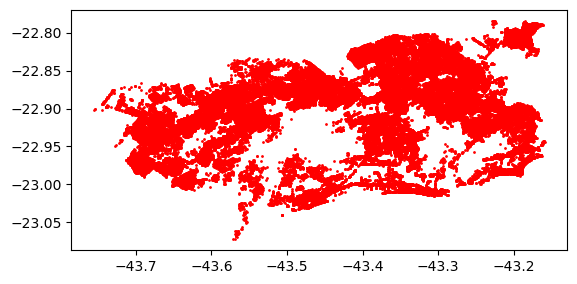

In [16]:
pontos.plot(markersize=1, c='red')

In [17]:
pontos#['codBairro']

0        POINT (-43.20686 -22.98095)
1        POINT (-43.20693 -22.98147)
2        POINT (-43.20639 -22.98096)
3        POINT (-43.20476 -22.98105)
4        POINT (-43.20471 -22.98017)
                    ...             
70978    POINT (-43.27179 -22.89000)
70979    POINT (-43.30102 -22.84157)
70980    POINT (-43.30113 -22.84158)
70981    POINT (-43.21357 -22.92667)
70982    POINT (-43.23692 -22.86294)
Length: 70983, dtype: geometry

In [18]:
pontos.shape[0]

70983

In [19]:
from tqdm import tqdm

pontos_zoados = []
for i in tqdm(range(pontos.shape[0])):
    if df_regions[df_regions['geometry'].contains(pontos[i])].shape[0] == 0:
        pontos_zoados.append(pontos[i])

  0%|          | 0/70983 [00:00<?, ?it/s]

100%|██████████| 70983/70983 [01:40<00:00, 706.25it/s]


In [20]:
pontos_zoados = gpd.GeoSeries(pontos_zoados)
pontos_zoados

0     POINT (-43.28886 -22.80843)
1     POINT (-43.28861 -22.80795)
2     POINT (-43.28384 -22.80770)
3     POINT (-43.28831 -22.81034)
4     POINT (-43.28851 -22.80951)
5     POINT (-43.28773 -22.80874)
6     POINT (-43.28664 -22.80806)
7     POINT (-43.17455 -22.82019)
8     POINT (-43.36146 -22.80431)
9     POINT (-43.18897 -22.79382)
10    POINT (-43.18927 -22.79543)
11    POINT (-43.25216 -22.83760)
12    POINT (-43.68896 -22.99060)
dtype: geometry

In [21]:
df_neighborhoods[df_neighborhoods['geometry'].contains(pontos_zoados[0])]

Empty GeoDataFrame
Columns: [objectid, área, nome, regiao_adm, area_plane, codbairro, codra, codbnum, link, rp, cod_rp, codbairro_long, st_areashape, st_perimetershape, geometry]
Index: []

In [66]:
pontos_zoados[0].coords[0][0]

-43.2888564

In [74]:
df_regions['nomera'].unique()

array(['Portuária', 'Centro', 'Rio Comprido', 'Botafogo', 'Copacabana',
       'Lagoa', 'São Cristóvão', 'Tijuca', 'Vila Isabel', 'Ramos',
       'Penha', 'Inhaúma', 'Méier', 'Irajá', 'Madureira', 'Santa Cruz',
       'Ilha do Governador', 'Paquetá', 'Anchieta', 'Santa Teresa',
       'Barra da Tijuca', 'Pavuna', 'Guaratiba', 'Rocinha', 'Jacarezinho',
       'Complexo do Alemão', 'Complexo da Maré', 'Vigário Geral',
       'Realengo', 'Jacarepaguá', 'Cidade de Deus', 'Bangu',
       'Campo Grande'], dtype=object)

In [76]:
ra = \
pd.Series(['Vigário Geral', 'Vigário Geral', 'Vigário Geral', 'Vigário Geral', 'Vigário Geral',\
           'Vigário Geral', 'Vigário Geral', 'Ilha do Governador', 'Pavuna', 'Ilha do Governador',\
           'Ilha do Governador', 'Complexo da Maré', 'Santa Cruz'
            ])
ra

0          Vigário Geral
1          Vigário Geral
2          Vigário Geral
3          Vigário Geral
4          Vigário Geral
5          Vigário Geral
6          Vigário Geral
7     Ilha do Governador
8                 Pavuna
9     Ilha do Governador
10    Ilha do Governador
11      Complexo da Maré
12            Santa Cruz
dtype: object

In [90]:
df_1 = pd.concat([pontos_zoados, ra], axis=1)
dict_colors = {"Vigário Geral": 'blue', 'Ilha do Governador': 'black', 'Pavuna':'red', 'Complexo da Maré': 'green', 'Santa Cruz': 'purple'}
# df_1[2] = df_1[1].apply(lambda x: dict_colors[x])

In [91]:
df_1

0                   1
0   POINT (-43.28886 -22.80843)       Vigário Geral
1   POINT (-43.28861 -22.80795)       Vigário Geral
2   POINT (-43.28384 -22.80770)       Vigário Geral
3   POINT (-43.28831 -22.81034)       Vigário Geral
4   POINT (-43.28851 -22.80951)       Vigário Geral
5   POINT (-43.28773 -22.80874)       Vigário Geral
6   POINT (-43.28664 -22.80806)       Vigário Geral
7   POINT (-43.17455 -22.82019)  Ilha do Governador
8   POINT (-43.36146 -22.80431)              Pavuna
9   POINT (-43.18897 -22.79382)  Ilha do Governador
10  POINT (-43.18927 -22.79543)  Ilha do Governador
11  POINT (-43.25216 -22.83760)    Complexo da Maré
12  POINT (-43.68896 -22.99060)          Santa Cruz

<Axes: >

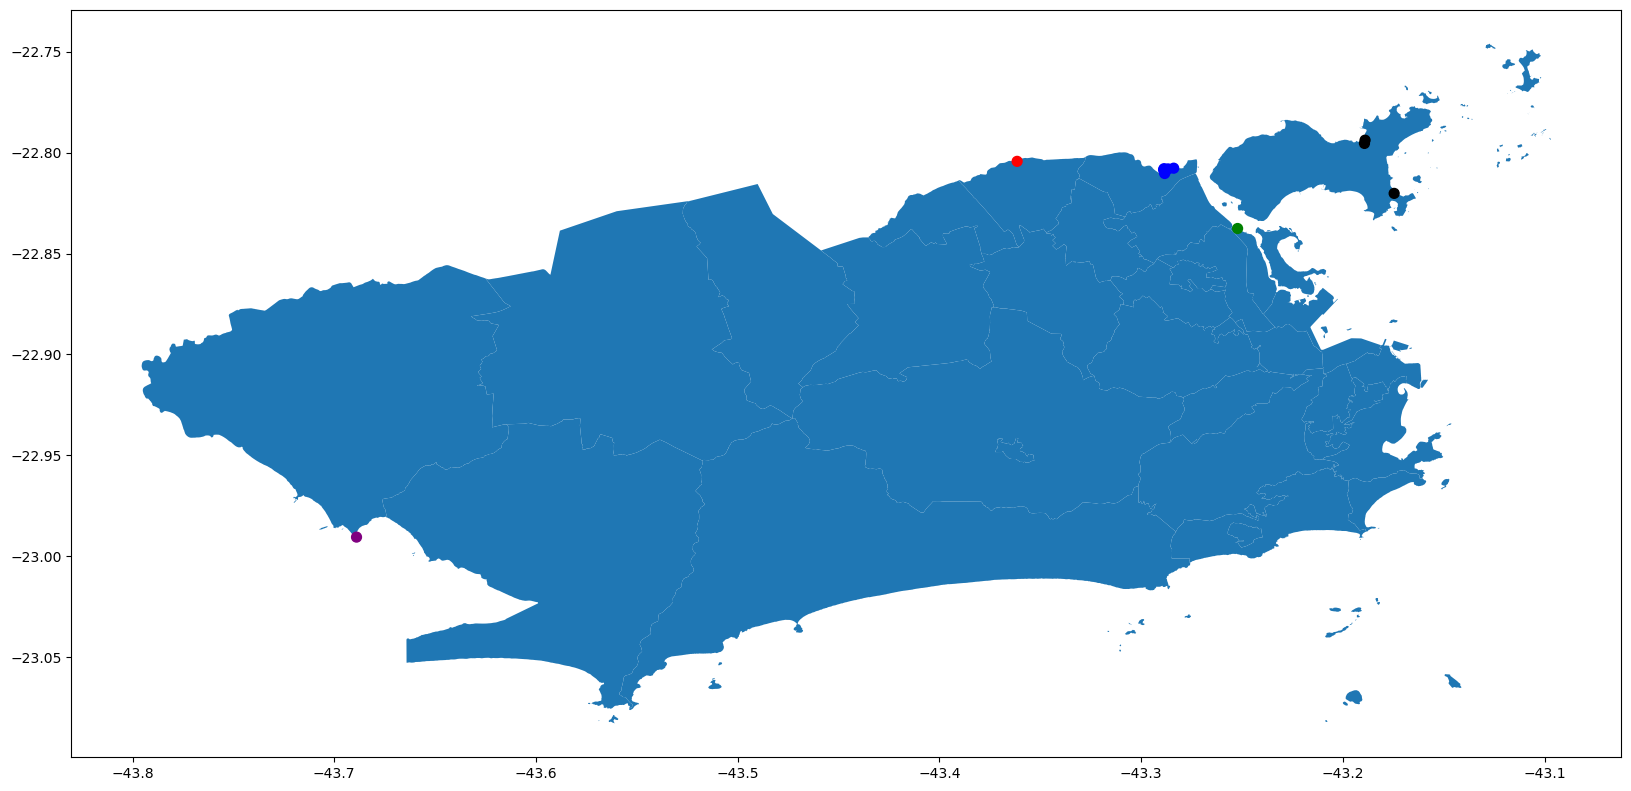

In [89]:
# hex_colors = ['#FF5733', '#33FF57', '#5733FF', '#FF33A1', '#33A1FF',\
#               '#A1FF33', '#FF3333', '#33FFA1', '#A133FF', '#FFA133',\
#               '#33FF33', '#FF33FF', '#A13357']
hex_colors = ['#4C4C4C', '#990000', '#006600', '#003366', '#660066', '#804000', '#00274D', '#B30000', '#004C99', '#993366', '#666600', '#1A1A1A', '#FFD700']
colors = ['red', 'green', 'blue', 'yellow', 'cyan', 'magenta', 'black', 'white', 'gray', 'orange', 'purple', 'brown', 'pink']
# colors_dict = {
#     'red': vigário geral, 
#     'green': 'vigário geral', 
#     'blue': 'vigário geral',
#     'yellow': 'vigário geral', 
#     'cyan':'vigário geral', 
#     'magenta': 'vigário geral', 
#     'black':'vigário geral', 
#     'white': 'ilha do governador', 
#     'gray':'pavuna', 
#     'orange': 'ilha do governador', 
#     'purple':'ilha do govenador', 
#     'brown':'maré',
#     'pink':'santa cruz'
#     }

fig, ax = plt.subplots(1,1, figsize=(20,10))
df_regions['geometry'].plot(ax=ax)
# df_neighborhoods[df_neighborhoods['geometry'].contains(pontos[150])]['geometry'].plot(ax=ax, color='yellow')
df_1[0].plot(markersize=50, c=df_1[2], ax=ax)

# pontos_zoados[0].plot(markersize=150, c='red')
# ax.scatter(pontos_zoados[0].coords[0][0], pontos_zoados[0].coords[0][1], c='red',s=150)
# pontos_zoados.explore()

In [106]:
df_regions[df_regions['geometry'].contains(pontos[0])]['nomera'].values[0]

'Lagoa'

In [107]:
pontos_ok = []
for i in tqdm(range(pontos.shape[0])):
    cur_ra = df_regions[df_regions['geometry'].contains(pontos[i])]
    if cur_ra.shape[0] != 0:
        pontos_ok.append([pontos[i], cur_ra['nomera'].values[0]])

100%|██████████| 70983/70983 [01:49<00:00, 646.32it/s]


In [113]:
df_2 = gpd.GeoDataFrame(pontos_ok)
df_2

0                 1
0      POINT (-43.2068586 -22.9809491)             Lagoa
1      POINT (-43.2069254 -22.9814703)             Lagoa
2      POINT (-43.2063921 -22.9809587)             Lagoa
3       POINT (-43.2047561 -22.981045)             Lagoa
4      POINT (-43.2047082 -22.9801679)             Lagoa
...                                ...               ...
70965   POINT (-43.271785 -22.8899963)             Méier
70966  POINT (-43.3010216 -22.8415723)             Penha
70967   POINT (-43.3011345 -22.841577)             Penha
70968  POINT (-43.2135726 -22.9266661)      Rio Comprido
70969  POINT (-43.2369209 -22.8629396)  Complexo da Maré

[70970 rows x 2 columns]

In [128]:
df_final = pd.concat([df_1, df_2], axis=0)
df_final = gpd.GeoDataFrame(df_final)
df_final

0                 1
0      POINT (-43.2888564 -22.8084319)     Vigário Geral
1      POINT (-43.2886119 -22.8079462)     Vigário Geral
2      POINT (-43.2838436 -22.8077044)     Vigário Geral
3      POINT (-43.2883116 -22.8103374)     Vigário Geral
4         POINT (-43.288514 -22.80951)     Vigário Geral
...                                ...               ...
70965   POINT (-43.271785 -22.8899963)             Méier
70966  POINT (-43.3010216 -22.8415723)             Penha
70967   POINT (-43.3011345 -22.841577)             Penha
70968  POINT (-43.2135726 -22.9266661)      Rio Comprido
70969  POINT (-43.2369209 -22.8629396)  Complexo da Maré

[70983 rows x 2 columns]

In [161]:
botafogo = gpd.GeoSeries(df_final[df_final[1] == 'Penha'][0])

<Axes: >

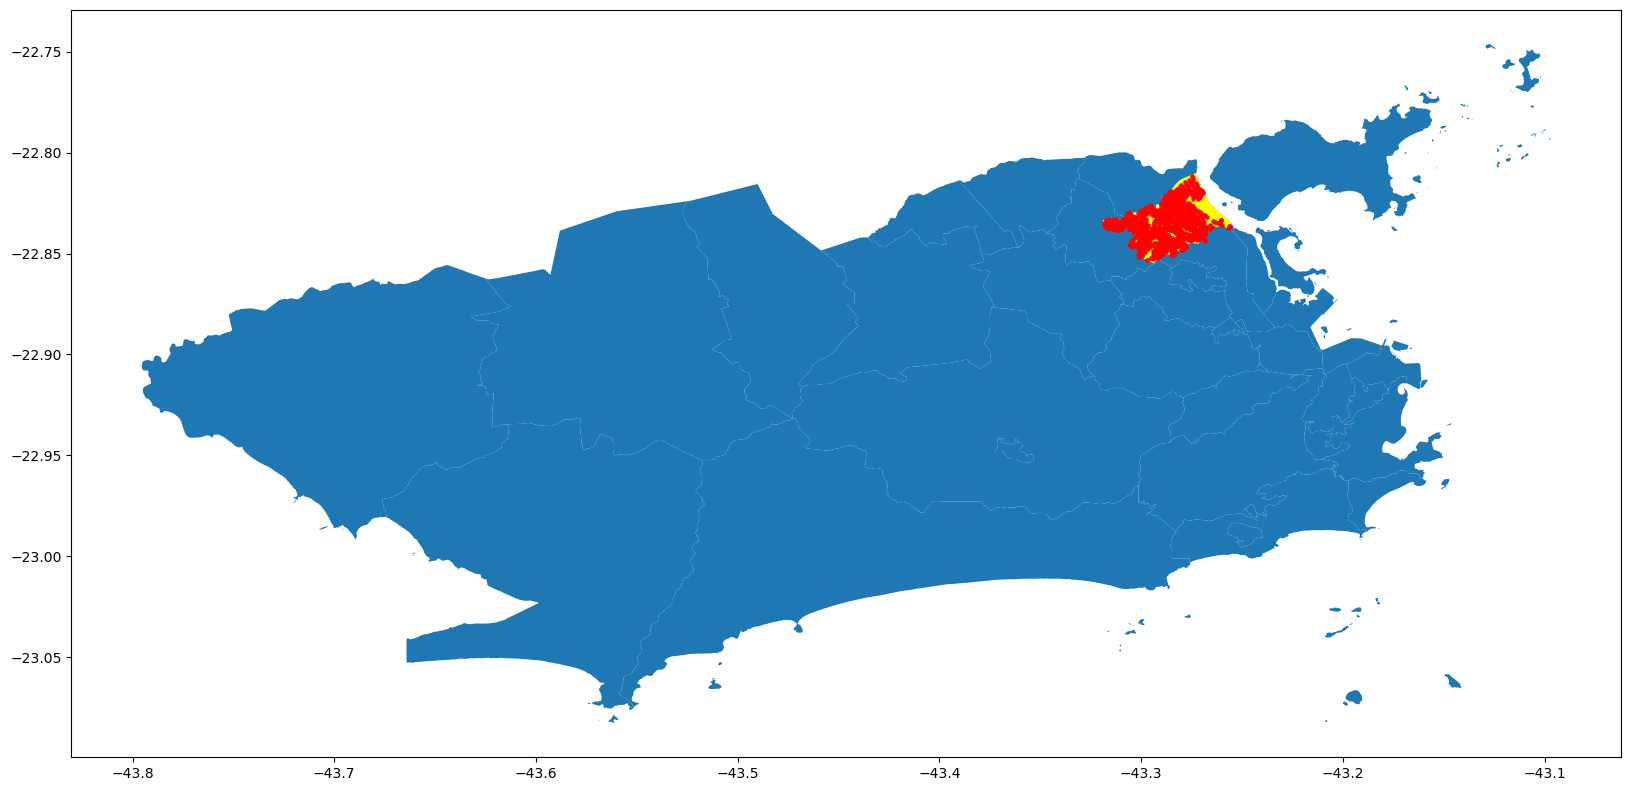

In [162]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
df_regions['geometry'].plot(ax=ax)
df_regions[df_regions['nomera'] == 'Penha']['geometry'].plot(color='yellow', ax=ax)
# df_neighborhoods[df_neighborhoods['geometry'].contains(pontos[150])]['geometry'].plot(ax=ax, color='yellow')
botafogo.plot(markersize=5, c='red', ax=ax)

In [147]:
type(botafogo.iloc[0].coords[0])

tuple

In [163]:
botafogo_nodes = list(botafogo.apply(lambda x: x.coords[0]))
botafogo_G = G.subgraph(botafogo_nodes)

In [164]:
bet_centrality = nx.betweenness_centrality(botafogo_G)

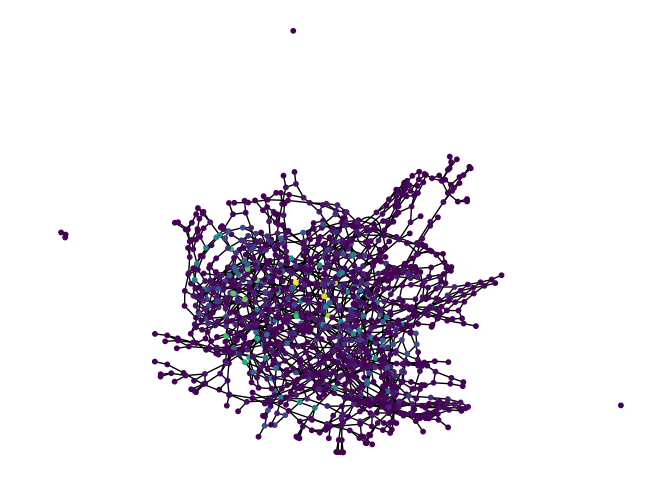

In [165]:
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cent = np.fromiter(bet_centrality.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = cm.viridis

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

# plt.colorbar(scalarmappaple)
nx.draw(botafogo_G, node_size=10, node_color=sizes, cmap=colormap)
plt.show()

In [166]:
from math import sin, cos, sqrt, atan2, radians

def dist(coord1, coord2):
    # Approximate radius of earth in km
    R = 6373.0

    lat1 = radians(coord1[0])
    lon1 = radians(coord1[1])
    lat2 = radians(coord2[0])
    lon2 = radians(coord2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [171]:
dist((-22.924588987366903, -43.17123249559037),(-22.931031542443964, -43.172992024608746)) # tá funcionando

0.7389261681723553

---

### Weighted graph 

In [188]:
weights = [dist(i[0], i[1]) for i in data]
G_w = nx.Graph()
G_w.add_edges_from(data, weights=weights)

In [202]:
[
    [list(bet_centrality.keys())[i][0],
     list(bet_centrality.keys())[i][1],
     list(bet_centrality.values())[i]] for i in range(len(list(bet_centrality.keys())))
]

[[-43.2634279, -22.8341798, 0.02658982195537458],
 [-43.2850571, -22.8251262, 0.03427324331493948],
 [-43.3005947, -22.8309052, 0.00914292905130735],
 [-43.3057999, -22.8296468, 0.0],
 [-43.270744, -22.8360811, 0.008143978504862792],
 [-43.2917001, -22.8307714, 0.005276334874211349],
 [-43.3005644, -22.8370247, 0.007435210864245949],
 [-43.287027, -22.8447197, 0.008106835934194692],
 [-43.2744428, -22.8262344, 0.10189097327955943],
 [-43.2870232, -22.8307818, 0.0],
 [-43.2852705, -22.8188461, 0.022504934065528132],
 [-43.2693784, -22.8192653, 0.005187074237068694],
 [-43.2714926, -22.8210188, 0.0152972916846372],
 [-43.2851097, -22.8302875, 0.0012535205577561125],
 [-43.2919961, -22.8512207, 1.5810226687030237e-05],
 [-43.2787105, -22.8428159, 0.014795671026100335],
 [-43.2753938, -22.8265086, 0.008821397060974697],
 [-43.2907888, -22.8377506, 0.10118562483518002],
 [-43.279291, -22.8286346, 0.007553521467066163],
 [-43.2938388, -22.8510304, 6.324090674812095e-06],
 [-43.2948647, -22.8

In [205]:
[] + [[1,2,3],[4,5,6]] + [[7,8,9]]

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [217]:
list(cur_betweeness.keys())[1], list(cur_betweeness.values())[1]

((-43.1892848, -22.9001122), 0.0005405093998525318)

In [234]:
betweeness = []
for i in tqdm(df_regions['nomera'].unique()):
    cur_ra = gpd.GeoSeries(df_final[df_final[1] == i][0])
    cur_nodes = list(cur_ra.apply(lambda x: x.coords[0]))
    # print(len(cur_nodes))
    cur_G = G.subgraph(cur_nodes)
    cur_betweeness = nx.betweenness_centrality(cur_G)
    betweeness_list = [(
        list(cur_betweeness.keys())[j],
        list(cur_betweeness.values())[j]
        ) for j in range(len(list(cur_betweeness.keys())))]
    betweeness += betweeness_list

100%|██████████| 33/33 [1:06:08<00:00, 120.27s/it]


In [235]:
for i in betweeness:
    print(i[0][0], i[0][1], i[1])

-43.197349 -22.9037984 0.03692348078665354
-43.2308348 -22.8794066 0.002781996263884086
-43.2193786 -22.879452 0.008395861904304353
-43.2146069 -22.8920506 0.011263402580501777
-43.2002242 -22.9013681 0.015082673468605834
-43.2189126 -22.8788643 0.0
-43.231008 -22.8784981 0.0
-43.2293389 -22.8820498 0.0008888622997077679
-43.2041151 -22.9003999 0.024753271436724785
-43.2195993 -22.8785463 0.0
-43.2279544 -22.8800587 0.0007918296533874662
-43.1916842 -22.8987294 0.0071278203369991525
-43.2285476 -22.881777 0.0003244749095588972
-43.2095205 -22.8984223 0.022870829766691428
-43.2147007 -22.8918235 0.004501887416898818
-43.2038641 -22.903518 0.021092807722083644
-43.2119454 -22.8752616 0.0007948917287584839
-43.2094731 -22.9057212 0.003347126866596946
-43.2167669 -22.8878674 0.007565617234528046
-43.23148 -22.879321 0.00604675094765154
-43.1874212 -22.8976124 0.017866582500464967
-43.1888085 -22.8982373 0.0
-43.1954245 -22.8952247 0.0
-43.2046761 -22.9039082 0.004654494282467482
-43.195255

In [207]:
len(betweeness)

70983

In [209]:
betweeness

[(-43.197349, -22.9037984),
 (-43.2308348, -22.8794066),
 (-43.2193786, -22.879452),
 (-43.2146069, -22.8920506),
 (-43.2002242, -22.9013681),
 (-43.2189126, -22.8788643),
 (-43.231008, -22.8784981),
 (-43.2293389, -22.8820498),
 (-43.2041151, -22.9003999),
 (-43.2195993, -22.8785463),
 (-43.2279544, -22.8800587),
 (-43.1916842, -22.8987294),
 (-43.2285476, -22.881777),
 (-43.2095205, -22.8984223),
 (-43.2147007, -22.8918235),
 (-43.2038641, -22.903518),
 (-43.2119454, -22.8752616),
 (-43.2094731, -22.9057212),
 (-43.2167669, -22.8878674),
 (-43.23148, -22.879321),
 (-43.1874212, -22.8976124),
 (-43.1888085, -22.8982373),
 (-43.1954245, -22.8952247),
 (-43.2046761, -22.9039082),
 (-43.1952557, -22.8963611),
 (-43.2179611, -22.8785271),
 (-43.1989305, -22.8973598),
 (-43.1990603, -22.8973674),
 (-43.1959517, -22.8930166),
 (-43.2285285, -22.8825636),
 (-43.2247049, -22.8796411),
 (-43.1948914, -22.902988),
 (-43.1908649, -22.896937),
 (-43.2295642, -22.8826161),
 (-43.1967115, -22.89648

In [236]:
file = open('../public/betweeness.csv', "w")
# keys_list = list(degree_centrality.keys())

for i in betweeness:
    if i == betweeness[-1]:
        file.write(str(i[0][0])+','+str(i[0][1])+','+str(i[1])) #str(i[0])+','+str(i[1])+','+str(i[2]))
    else:
        file.write(str(i[0][0])+','+str(i[0][1])+','+str(i[1])+'\n')

file.close()

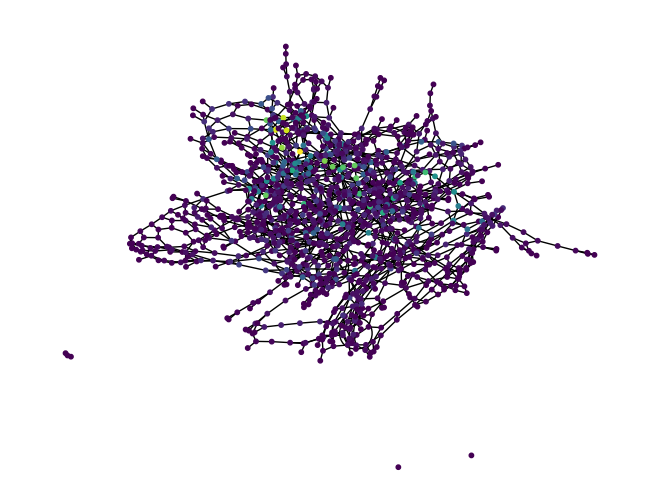

In [187]:
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cent = np.fromiter(bet_centrality.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = cm.viridis

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

# plt.colorbar(scalarmappaple)
nx.draw(botafogo_G, node_size=10, node_color=sizes, cmap=colormap)
plt.show()

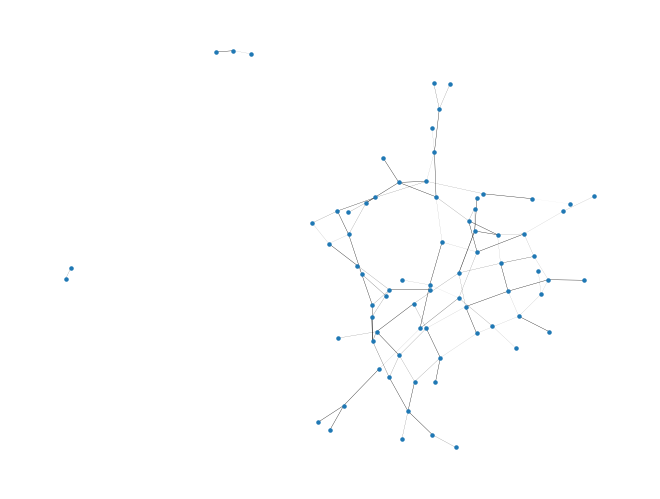

In [183]:
nx.draw(G_w,node_size=5,width=50*weights)

In [186]:
botafogo_G = G_w.subgraph(botafogo_nodes)
bet_centrality = nx.betweenness_centrality(botafogo_G)

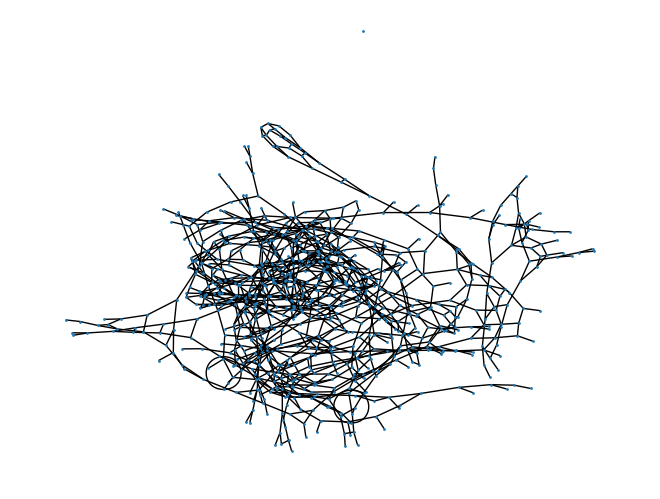

In [155]:
nx.draw(botafogo_G, node_size=1)

In [139]:
from tqdm import tqdm

lista_bairros = []
for ponto in tqdm(pontos):
    lista_bairros.append(df_neighborhoods[df_neighborhoods['geometry'].contains(ponto)]['codbairro'].values)

100%|██████████| 70983/70983 [01:23<00:00, 846.42it/s]


In [165]:
pontos_df = gpd.GeoDataFrame(pontos)
pontos_df.columns = ['coord']
pontos_df

coord
0      POINT (-43.20686 -22.98095)
1      POINT (-43.20693 -22.98147)
2      POINT (-43.20639 -22.98096)
3      POINT (-43.20476 -22.98105)
4      POINT (-43.20471 -22.98017)
...                            ...
70978  POINT (-43.27179 -22.89000)
70979  POINT (-43.30102 -22.84157)
70980  POINT (-43.30113 -22.84158)
70981  POINT (-43.21357 -22.92667)
70982  POINT (-43.23692 -22.86294)

[70983 rows x 1 columns]

In [170]:
pontos_df

coord codbairro
0      POINT (-43.20686 -22.98095)       nan
1      POINT (-43.20693 -22.98147)       nan
2      POINT (-43.20639 -22.98096)       nan
3      POINT (-43.20476 -22.98105)       nan
4      POINT (-43.20471 -22.98017)       nan
...                            ...       ...
70978  POINT (-43.27179 -22.89000)       nan
70979  POINT (-43.30102 -22.84157)       nan
70980  POINT (-43.30113 -22.84158)       nan
70981  POINT (-43.21357 -22.92667)       nan
70982  POINT (-43.23692 -22.86294)       nan

[70983 rows x 2 columns]

In [169]:
pontos_df['codbairro'] = 'nan'
i = 0
for ponto in tqdm(pontos):
    pontos_df['codbairro'][i] = df_neighborhoods[df_neighborhoods['geometry'].contains(ponto)]['codbairro'].values
    i += 1

  0%|          | 0/70983 [00:00<?, ?it/s]


ValueError: Length of values (1) does not match length of index (70983)

In [137]:
import pandas as pd
lista_bairros[0].values[0]

'025'

In [140]:
df_neighborhoods[df_neighborhoods['geometry'].contains(pontos[0])]['codbairro'].values

array(['025'], dtype=object)

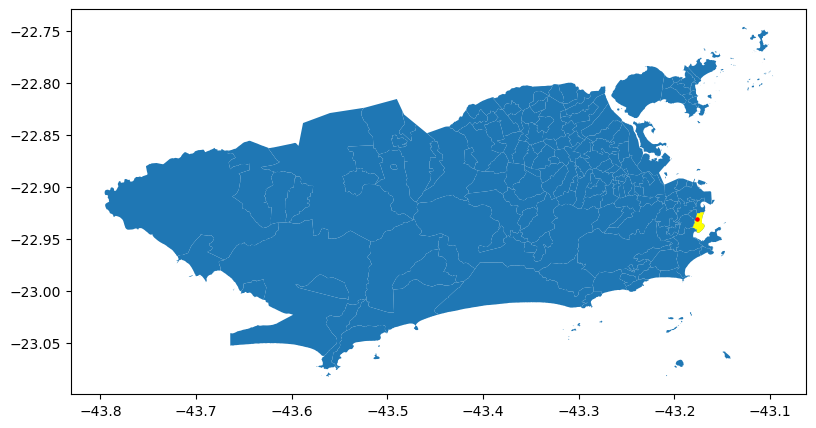

In [117]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
df_neighborhoods['geometry'].plot(ax=ax)
df_neighborhoods[df_neighborhoods['geometry'].contains(pontos[150])]['geometry'].plot(ax=ax, color='yellow')
# pontos.plot(markersize=.5, c='red', ax=ax)
ax.scatter(list(G.nodes())[150][0], list(G.nodes())[150][1], c='red',s=5)

---

### Eigenvector centrality

In [60]:
# eigenvec_centrality = nx.eigenvector_centrality(G)

---

### Betweeness centrality

In [18]:
G_test = nx.Graph()
G_test.add_edges_from(data[:100])

In [19]:
betweenness_test = nx.betweenness_centrality(G_test)

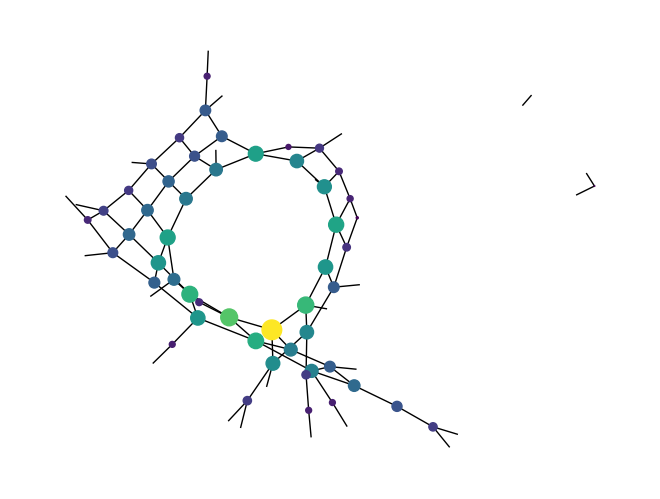

In [20]:
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cent = np.fromiter(betweenness_test.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = cm.viridis

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

# plt.colorbar(scalarmappaple)
nx.draw(G_test, node_size=sizes, node_color=sizes, cmap=colormap)
plt.show()

In [237]:
df_final

0                 1
0      POINT (-43.2888564 -22.8084319)     Vigário Geral
1      POINT (-43.2886119 -22.8079462)     Vigário Geral
2      POINT (-43.2838436 -22.8077044)     Vigário Geral
3      POINT (-43.2883116 -22.8103374)     Vigário Geral
4         POINT (-43.288514 -22.80951)     Vigário Geral
...                                ...               ...
70965   POINT (-43.271785 -22.8899963)             Méier
70966  POINT (-43.3010216 -22.8415723)             Penha
70967   POINT (-43.3011345 -22.841577)             Penha
70968  POINT (-43.2135726 -22.9266661)      Rio Comprido
70969  POINT (-43.2369209 -22.8629396)  Complexo da Maré

[70983 rows x 2 columns]

In [265]:
# nomes_ra = list(df_regions[['nomera', 'codra']].to_dict()['nomera'].values())
# cod_ra = list(df_regions[['nomera', 'codra']].to_dict()['codra'].values())
# # dict_regions
# nomes_ra, cod_ra

In [275]:
df_regions[df_regions['nomera'] == 'Penha']['codra'].values[0]

11

In [277]:
df_final[2] = df_final[1].apply(lambda x: df_regions[df_regions['nomera'] == x]['codra'].values[0])

In [279]:
df_final

0                 1   2
0      POINT (-43.2888564 -22.8084319)     Vigário Geral  31
1      POINT (-43.2886119 -22.8079462)     Vigário Geral  31
2      POINT (-43.2838436 -22.8077044)     Vigário Geral  31
3      POINT (-43.2883116 -22.8103374)     Vigário Geral  31
4         POINT (-43.288514 -22.80951)     Vigário Geral  31
...                                ...               ...  ..
70965   POINT (-43.271785 -22.8899963)             Méier  13
70966  POINT (-43.3010216 -22.8415723)             Penha  11
70967   POINT (-43.3011345 -22.841577)             Penha  11
70968  POINT (-43.2135726 -22.9266661)      Rio Comprido   3
70969  POINT (-43.2369209 -22.8629396)  Complexo da Maré  30

[70983 rows x 3 columns]

In [285]:
df_final[0.1] = df_final[0].apply(lambda x: x.coords[0][0])
df_final[0.2] = df_final[0].apply(lambda x: x.coords[0][1])

In [289]:
df_final = df_final[[0.1, 0.2, 2.0, 1.0]]

In [306]:
df_final.to_csv('../public/nodes_ra.csv',lineterminator='\n', header=None, index=False)

In [307]:
with open('../public/nodes_ra.csv','r') as f:
    lines = f.readlines()
    f.close()

lines[-1] = lines[-1].strip('\n')
with open('../public/nodes_ra.csv','w') as f:
    for l in lines:
        f.write(l)

In [246]:
df_regions['codra'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 16, 34, 17, 18])